# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;STATISTICAL THINKING



## Assignment

### Instructions
In the next series of challenges, we will predict employee salaries from different employee characteristics (or features). We ask employees working in four different fields to state their salary and some background information.

Import the data salary.csv to a Jupyter Notebook. You will need the packages matplotlib, seaborn, pandas and statsmodels. A description of the variables is given in Salary metadata.csv.

In [1]:
# Suggested libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
# Additional libraries
from scipy.stats import iqr
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.express as px
import plotly.graph_objects as go

init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Importing the data
data = pd.read_csv("salary.csv")

## Questions

**1. How many responders are there? Are there any missing values in any of the variables?**

In [3]:
print("Total number of responders:\t\t{}".format(len(data)))
print("Number of columns with missing values:\t{}".format(len(data[data.isnull().any(axis=1)])))
print("\nA look at the row with missing value:")
data[data.isnull().any(axis=1)]

Total number of responders:		514
Number of columns with missing values:	1

A look at the row with missing value:


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


**2. What is the lowest salary and highest salary in the group?**

In [4]:
print("Lowest salary:\t\t{}".format(data["salary"].min()))
print("Highest salary:\t\t{}".format(data["salary"].max()))

Lowest salary:		29000.0
Highest salary:		96156.0


**3. What is the mean salary for the sample? Include the standard error of the mean.**

In [5]:
print("Mean of salary:\t\t\t{}".format(data["salary"].mean()))
print("Standard error of salary mean:\t{}".format(data["salary"].sem()))

Mean of salary:			50863.22009783625
Standard error of salary mean:	560.0622753925232


**4. What is the standard deviation for the years worked?**

In [6]:
print("Standard deviation of years worked:\t{}".format(data["yearsworked"].std()))

Standard deviation of years worked:	9.444695144169803


**5. What is the median salary for the sample?**

In [7]:
print("Median of salary:\t{}".format(data["salary"].median()))

Median of salary:	50096.0


**6. What is the interquartile range for salary in the sample?**

In [8]:
print("Interquartile range for salary:\t{}".format(iqr((data.dropna())["salary"])))

Interquartile range for salary:	20345.0


**7. How many men are there in the sample? How many women are there in the sample? Present this information in a table.**

In [9]:
print("Total Male and Female:")
(pd.DataFrame([{"Male":len(data[data["male"] == 1]), "Female":len(data[data["male"] == 0])}])).rename(index={0:"Total"})

Total Male and Female:


,Female,Male
Total,128,386


**8. How many women are executives compared to men?**

In [10]:
print("Women executives:\t{}".format(len(data[(data["male"] == 0) & (data["position"] == 3)])))
print("Men executives:\t\t{}".format(len(data[(data["male"] == 1) & (data["position"] == 3)])))

Women executives:	19
Men executives:		192


**9. Create a histogram for the variable Salary.**

In [11]:
print("Histogram of Salary:")
(px.histogram(data, x="salary", nbins=5)).show()

Histogram of Salary:


**10. Examine the histogram and describe the distribution for Salary.**

**49.12%**(252) of the sample data earn between **40k to 59k**

**24.76%**(127) of the sample data earn between **20k to 39k**

**24.17%**(124) of the sample data earn between **60k to 79k**

**1.95%**(10) of the sample data earn between **80k to 99k**

**11. Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?**

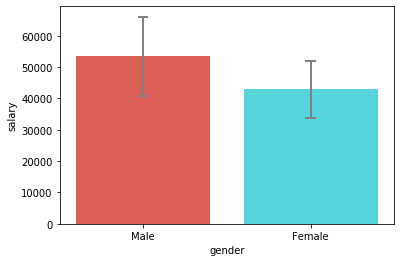

In [12]:
df = data.copy()
df["gender"] = df["male"].map({1:"Male", 0:"Female"})

sns.barplot(x = 'gender', y = 'salary', data = df,
            palette = 'hls',
           # order = ["Female", "Male"],
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray',
            errwidth = 2,  
            ci = 'sd'   
            )

**12. Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).
What is the relationship between Years Worked and Salary?
Describe any patterns in the scatterplot.
Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)**

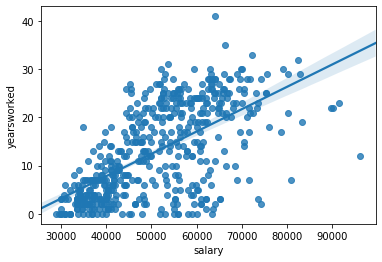

In [14]:
sns.regplot(x="salary", y="yearsworked", data=data)

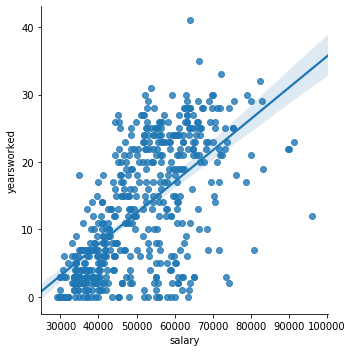

In [21]:
sns.lmplot(x='salary',y='yearsworked',data=data,fit_reg=True) 

**13. Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.
Interpret the size and direction of the correlation statistic.
Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.**

In [13]:
data

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.00000,0,0,0,1.17,1,0,1,1,3,0
1,58000.00000,1,0,0,1.24,1,0,1,1,2,0
2,45500.00000,0,0,0,1.21,1,0,1,1,3,2
3,35782.00000,0,2,1,0.99,1,0,1,1,4,1
4,34731.00000,0,2,2,0.91,1,0,1,1,4,1
5,56000.00000,1,0,0,1.19,1,0,1,1,1,0
6,61008.00000,0,2,2,1.33,1,0,1,1,2,0
7,39986.00000,0,2,0,0.99,1,0,1,1,4,0
8,36308.00000,0,2,1,0.85,1,0,1,1,1,1
9,55000.00000,0,0,0,1.23,1,0,1,1,1,1


In [17]:
data

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.00000,0,0,0,1.17,1,0,1,1,3,0
1,58000.00000,1,0,0,1.24,1,0,1,1,2,0
2,45500.00000,0,0,0,1.21,1,0,1,1,3,2
3,35782.00000,0,2,1,0.99,1,0,1,1,4,1
4,34731.00000,0,2,2,0.91,1,0,1,1,4,1
5,56000.00000,1,0,0,1.19,1,0,1,1,1,0
6,61008.00000,0,2,2,1.33,1,0,1,1,2,0
7,39986.00000,0,2,0,0.99,1,0,1,1,4,0
8,36308.00000,0,2,1,0.85,1,0,1,1,1,1
9,55000.00000,0,0,0,1.23,1,0,1,1,1,1


In [ ]:
df = data.copy()
df["gender"] = df["male"].map({1:"Male", 0:"Female"})